In [96]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

from io import BytesIO
import requests

In [26]:
sns.set(
    font_scale =2,
    style      ="whitegrid",
    rc         ={'figure.figsize':(20,7)}
)

Step 2 <a href='https://lab.karpov.courses/learning/85/module/1056/lesson/9044/26544/118026/'>link</a>
<br>Для начала, давайте посмотрим на распределение посещений сайта по дням. Постройте график с распределением количества посещений от ботов и обычных пользователей сайта Яндекс.Метрика. Данные для построения графика хранятся здесь.

In [4]:
df = pd.read_csv('step_1_lesson_7.csv', parse_dates=['date'])

In [5]:
df.head()

,date,user_type,visits
0,2020-06-15,People,417.0
1,2020-06-15,Robots,177.0
2,2020-06-16,People,472.0
3,2020-06-16,Robots,91.0
4,2020-06-17,People,475.0


In [22]:
users_by_day = df.groupby(by=['date', 'user_type'], as_index=False) \
    .agg({'visits': 'sum'})

users_by_day

,date,user_type,visits
0,2020-06-15,People,417.0
1,2020-06-15,Robots,177.0
2,2020-06-16,People,472.0
3,2020-06-16,Robots,91.0
4,2020-06-17,People,475.0
5,2020-06-17,Robots,138.0


<AxesSubplot:xlabel='date', ylabel='visits'>

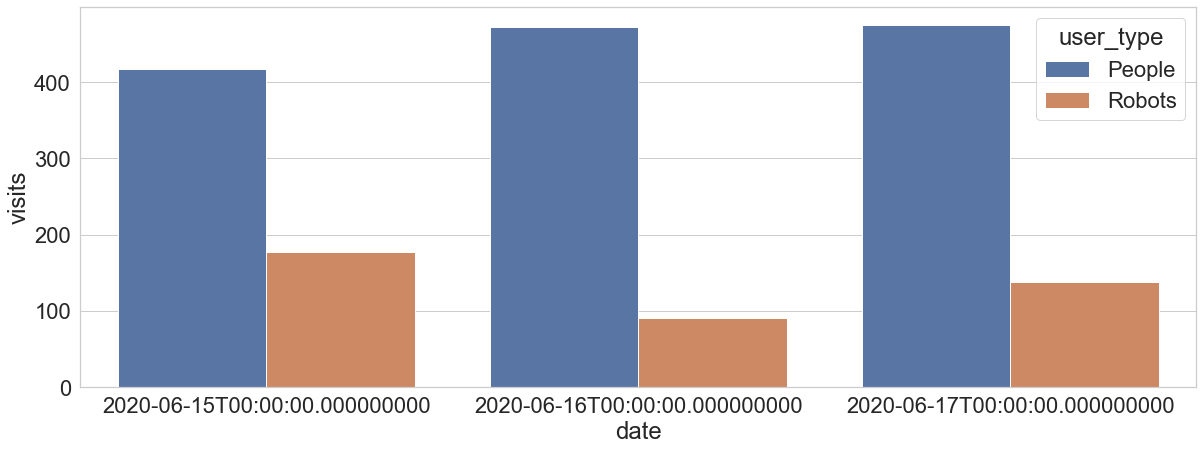

In [36]:
sns.barplot(data=users_by_day, x='date', y='visits', hue='user_type')

Step 3 <a href='https://lab.karpov.courses/learning/85/module/1056/lesson/9044/26544/118027/'>link</a>
<br>Определите процент посещений сайта Яндекс.Метрики с бразузера Google Chrome. Данные лежат здесь.

Ответ округлите до целого.

In [37]:
df = pd.read_csv('step_2_lesson_7.csv')

In [40]:
df.head()

,date,browser,visits
0,2020-06-15,Google Chrome,354.0
1,2020-06-15,Firefox,58.0
2,2020-06-15,Yandex Browser,54.0
3,2020-06-15,Safari,41.0
4,2020-06-15,Chrome Mobile,31.0


In [51]:
df.groupby(by='browser') \
    .agg({'visits':'sum'}) \
    .div(df.visits.sum()) \
    .mul(100) \
    .round(0) \
    .sort_values('visits', ascending=False) \
    .head()

,visits
browser,
Google Chrome,60.0
Firefox,10.0
Yandex Browser,9.0
Safari,7.0
Chrome Mobile,5.0


Step 4 <a href='https://lab.karpov.courses/learning/85/module/1056/lesson/9044/26544/118028/'>link</a>
<br>Давайте выясним, с какого браузера приходит больше всего ботов. Посмотрите на данные и определите, у какого браузера самая большая доля посещений сайта ботами от общего числа посещений в этом браузере?

В качестве ответа укажите название браузера.

In [52]:
df = pd.read_csv('step_3_lesson_7.csv')

In [53]:
df.head()

,date,browser,user_type,visits
0,2020-06-15,Google Chrome,People,250.0
1,2020-06-15,Google Chrome,Robots,104.0
2,2020-06-15,Yandex Browser,People,47.0
3,2020-06-15,Firefox,Robots,31.0
4,2020-06-15,Chrome Mobile,People,31.0


In [60]:
browser_by_user_type = df.groupby(by=['browser','user_type'], as_index=False) \
    .agg({'visits':'sum'}) \
    .pivot(index='browser', columns='user_type', values='visits') \
    .fillna(0)

browser_by_user_type['total'] = browser_by_user_type.People + browser_by_user_type.Robots

In [66]:
browser_by_user_type.head()

user_type,People,Robots,total,robot_percent
browser,,,,
Android Browser,1.0,0.0,1.0,0.0
Chrome Mobile,31.0,0.0,31.0,0.0
Chromium,1.0,1.0,2.0,0.5
CocCoc,1.0,0.0,1.0,0.0
Edge,4.0,1.0,5.0,0.2


In [65]:
 browser_by_user_type['robot_percent'] = browser_by_user_type.Robots.div(browser_by_user_type.total)

In [67]:
browser_by_user_type.sort_values('robot_percent', ascending=False).head()

user_type,People,Robots,total,robot_percent
browser,,,,
UCWEB,0.0,4.0,4.0,1.000000
Safari,19.0,22.0,41.0,0.536585
Firefox,27.0,31.0,58.0,0.534483
Chromium,1.0,1.0,2.0,0.500000
Opera,11.0,5.0,16.0,0.312500


In [79]:
b_u = df.groupby(by=['browser','user_type'], as_index=False) \
    .agg({'visits':'sum'}) \
    .sort_values('visits', ascending=False)

b_u.head()

,browser,user_type,visits
9,Google Chrome,People,250.0
10,Google Chrome,Robots,104.0
21,Yandex Browser,People,47.0
1,Chrome Mobile,People,31.0
8,Firefox,Robots,31.0


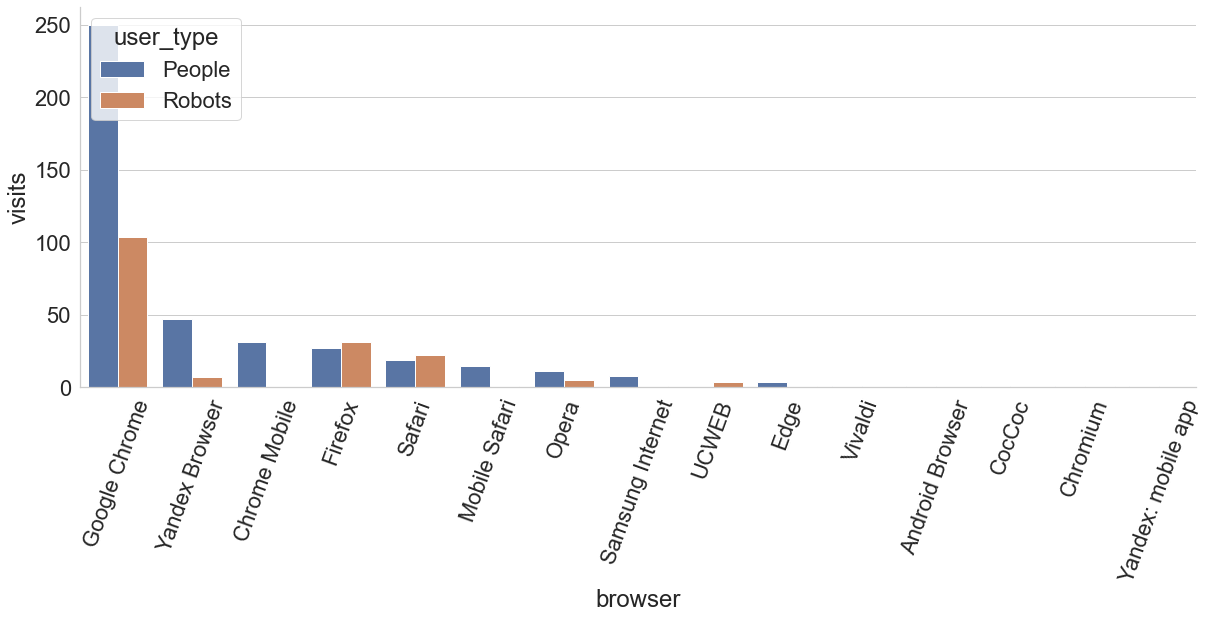

In [81]:
ax = sns.barplot(data=b_u, x='browser', y='visits', hue='user_type')
ax.set_xticklabels(ax.get_xticklabels(),rotation=70)
sns.despine()

Step 5 <a href='https://lab.karpov.courses/learning/85/module/1056/lesson/9044/26544/118029/'>link</a>
<br>Выгрузите данные, содержащие информацию о дне, типе пользователя, браузере. Создайте колонку с метрикой доли заходов на сайт для каждого из этих разрезов.

В ответе укажите процент открытий сайта настоящими пользователями Safari (не ботами) с точностью до 1 знака после точки.

Hint: обратите внимание, здесь вам нужно найти долю заходов конкретных типов пользователей с конкретного браузера от вообще всех-всех заходов на сайт за этот день.

In [82]:
df = pd.read_csv('step_4_lesson_7.csv')

In [92]:
df.head()

,date,browser,user_type,visits,visit_rate
0,2020-06-15,Google Chrome,People,250.0,0.420875
1,2020-06-15,Google Chrome,Robots,104.0,0.175084
2,2020-06-15,Yandex Browser,People,47.0,0.079125
3,2020-06-15,Firefox,Robots,31.0,0.052189
4,2020-06-15,Chrome Mobile,People,31.0,0.052189


In [94]:
df['visit_rate'] = df.visits.div(df.visits.sum()).mul(100).round(1)

In [95]:
df.query('user_type == "People" and browser == "Safari"')

,date,browser,user_type,visits,visit_rate
7,2020-06-15,Safari,People,19.0,3.2


Step 6 <a href='https://lab.karpov.courses/learning/85/module/1056/lesson/9044/26544/118030/'>link</a>
<br>💀 Сложное задание! 💀

При помощи библиотеки gspread отправьте данные из предыдущего шага в Google SpreadSheet. Далее отправьте ссылку на получившийся файл в Google SpreadSheet (не забудьте открыть доступ по ссылке, это можно сделать вручную, когда данные уже зальются в таблицу) при помощи VK API себе в личку ВКонтакте. 

В ответе напишите слово Да, если всё сделали :)



Step 7 <a href='https://lab.karpov.courses/learning/85/module/1056/lesson/9044/26544/118031/'>link</a>
<br>⭐️Задание со звёздочкой!⭐️

Другой аналитик уже агрегировал часть данных из метрики. Вам нужно объединить усилия, чтобы получить финальный отчет. Прочитайте дополнительные данные из Google SpreadSheet, объедините вашу таблицу из предыдущего шага с таблицей аналитика и посчитайте количество визитов на человека (отношение visits к users) в разрезе по браузеру и значениям Robots/People.

В ответе укажите, сколько визитов на уникального пользователя совершается ботами с браузера Google Chrome (округлите до целого)



In [100]:
df_my = df

In [99]:
link = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vQWMsvBTVio9C7IOOxfFO9C15BRHyME-_ENHqBodDOjuiHwk9fCuF5hUVmDs497PZOqPYK3exdSikOK/pub?gid=1006633900&single=true&output=csv'

r = requests.get(link)
data = r.content

df_new = pd.read_csv(BytesIO(data))

df_new.head()

,date,browser,user_type,users
0,2020-06-15,Google Chrome,People,240.0
1,2020-06-15,Google Chrome,Robots,104.0
2,2020-06-15,Yandex Browser,People,44.0
3,2020-06-15,Chrome Mobile,People,30.0
4,2020-06-15,Firefox,Robots,29.0


In [101]:
df_my.head()

,date,browser,user_type,visits,visit_rate
0,2020-06-15,Google Chrome,People,250.0,42.1
1,2020-06-15,Google Chrome,Robots,104.0,17.5
2,2020-06-15,Yandex Browser,People,47.0,7.9
3,2020-06-15,Firefox,Robots,31.0,5.2
4,2020-06-15,Chrome Mobile,People,31.0,5.2


In [105]:
common_df = df_my.merge(df_new, on=['date','browser', 'user_type'], how='left')
common_df.head()

,date,browser,user_type,visits,visit_rate,users
0,2020-06-15,Google Chrome,People,250.0,42.1,240.0
1,2020-06-15,Google Chrome,Robots,104.0,17.5,104.0
2,2020-06-15,Yandex Browser,People,47.0,7.9,44.0
3,2020-06-15,Firefox,Robots,31.0,5.2,29.0
4,2020-06-15,Chrome Mobile,People,31.0,5.2,30.0


In [112]:
common_df['visits_users_rate'] = common_df.visits.div(common_df.users).round()

In [116]:
common_df.head()

,date,browser,user_type,visits,visit_rate,users,visits_users_rate
0,2020-06-15,Google Chrome,People,250.0,42.1,240.0,1.0
1,2020-06-15,Google Chrome,Robots,104.0,17.5,104.0,1.0
2,2020-06-15,Yandex Browser,People,47.0,7.9,44.0,1.0
3,2020-06-15,Firefox,Robots,31.0,5.2,29.0,1.0
4,2020-06-15,Chrome Mobile,People,31.0,5.2,30.0,1.0
